In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_columns', 500)

In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
246,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [5]:
# Data Cleaning
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [6]:
# Drop rows which have null values
df.drop([122,123, 168],axis=0, inplace=True)
df = df.reset_index()
df.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [7]:
# Show all columns
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [8]:
# Column name having extra space
[x for x in df.columns if ' ' in x]

[' RH', ' Ws', 'Rain ', 'Classes  ']

In [9]:
# Remove extra space in column names
df.columns=df.columns.str.strip()
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [10]:
# Function to remove extra space from the data
import re
def remove_extra_space(x):
    return(re.sub(' +',' ',x).strip())

In [11]:
# Remove exxtra space from the data
df['Classes']=df['Classes'].apply(remove_extra_space)

In [12]:
# Drop extra index column, which was created for reset_index
df.drop(['index'],axis=1, inplace=True)


In [13]:
# Create data feature with the help of day, month and year feature and converted to
# datetime
df.drop([122],axis=0,inplace=True)
df['date'] = pd.to_datetime(df[['day','month','year']])

In [14]:
df.sample(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,date
114,23,9,2012,32,54,11,0.5,73.7,7.9,30.4,1.2,9.6,0.7,not fire,2012-09-23
142,20,6,2012,31,72,14,0.2,60.2,3.8,8,0.8,3.7,0.3,not fire,2012-06-20
15,16,6,2012,29,89,13,0.7,36.1,1.7,7.6,0,2.2,0,not fire,2012-06-16
202,20,8,2012,36,81,15,0,83.7,34.4,107,3.8,38.1,9,fire,2012-08-20
89,29,8,2012,35,48,18,0,90.1,54.2,220.4,12.5,67.4,30.2,fire,2012-08-29


In [15]:
# Drop day,month,year feature
df.drop(['day','month','year'], axis=1, inplace = True)

In [16]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,date
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,2012-06-04
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2012-09-26
240,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2012-09-27
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2012-09-28
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2012-09-29


In [17]:
# Imputation of date based on temperature. Usually in summer temperature is more
# and in winter it is less. So, we have categorized it based on month
def date_imputation(x):
    if (x >= pd.to_datetime('2012-07-01')) and (x <= pd.to_datetime('2012-09-01')):
        return 1
    else:
        return 0
df['date'] = df['date'].apply(date_imputation)
df['date'].value_counts()

1    125
0    118
Name: date, dtype: int64

In [18]:
# Create one region,just to identify the two region i.e.,Sidi-Bel Abbes Region and Bejaia
# Region
df.loc[:122, 'Region']=0
df.loc[122:, 'Region']=1

In [19]:
# check null values in all the features
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
date           0
Region         0
dtype: int64

In [20]:
# Map classes feature as 1 and 0 for fire and not fire respectively
df['Classes']=df['Classes'].map({'not fire' : 0 , 'fire' : 1})

In [21]:
# Check duplictes values in all the column
df.duplicated().sum()

0

In [22]:
# Check data types of all the features
df.dtypes

Temperature     object
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes          int64
date             int64
Region         float64
dtype: object

In [23]:
# Check data types of all the features
convert_data = {'Temperature':'float64','RH':'float64','Ws':'float64','DMC':'float64','DC':'float64',
                'ISI':'float64','BUI':'float64','FWI':'float64','Rain':'float64',
                'FFMC':'float64','Classes':'object','date':'object'}
df = df.astype(convert_data)

In [24]:
# Converted datatpyes
df.dtypes

Temperature    float64
RH             float64
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
date            object
Region         float64
dtype: object

In [25]:
# Check unique values in all the features
df.nunique()

Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            165
DC             197
ISI            106
BUI            173
FWI            125
Classes          2
date             2
Region           2
dtype: int64

In [26]:
# Check statistics of dataset
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [27]:
# Segregate categorical feature from the dataset
categorical_feature = [feature for feature in df.columns if df[feature].dtypes =='0']
categorical_feature

[]

In [28]:
for feature in categorical_feature:
    print(df.groupby(feature)[feature].value_counts())

In [29]:
#Segregate numerical feature from the dataset
numerical_features=[feature for feature in df.columns if df[feature].dtypes!=0]
print(numerical_features)

['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'date', 'Region']


In [30]:
#Segregate discrete feature from the numerical feature
#here the assumption to consider a feature discrete is that it should have less than 35 unique values otherwise it will be
# considered continuous feature
discrete_features=[feature for feature in numerical_features if len(df[feature].unique())<18]
discrete_features

['Classes', 'date', 'Region']

In [31]:
# Segregate continuous feature from the numerical feature
continuous_features=[feature for feature in numerical_features if feature not in discrete_features]
print(continuous_features)

['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


# GRAPHICAL ANALYSIS 


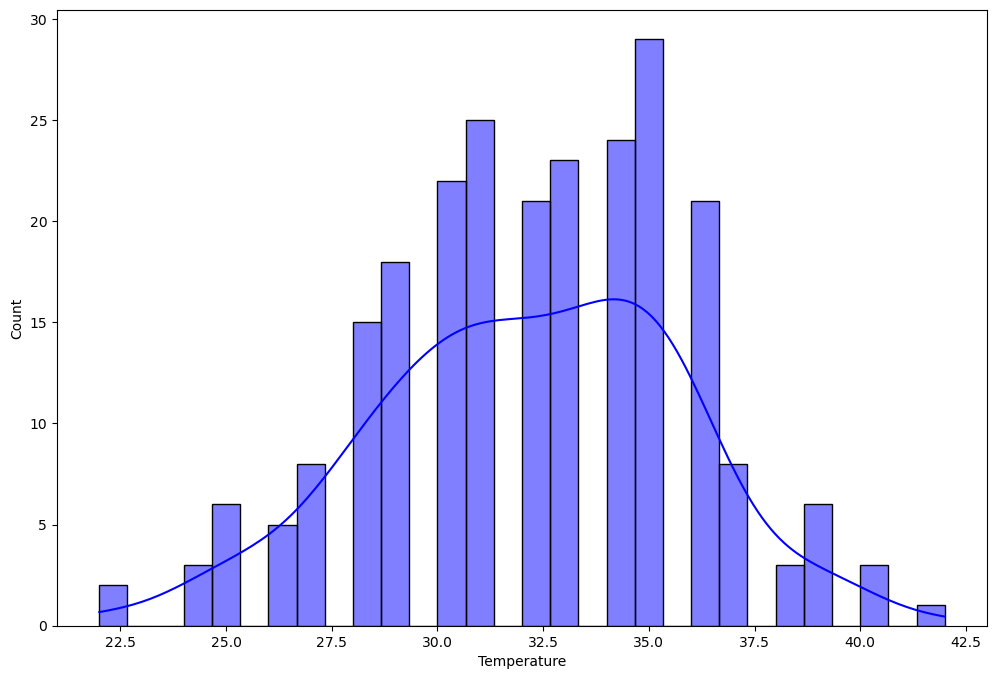

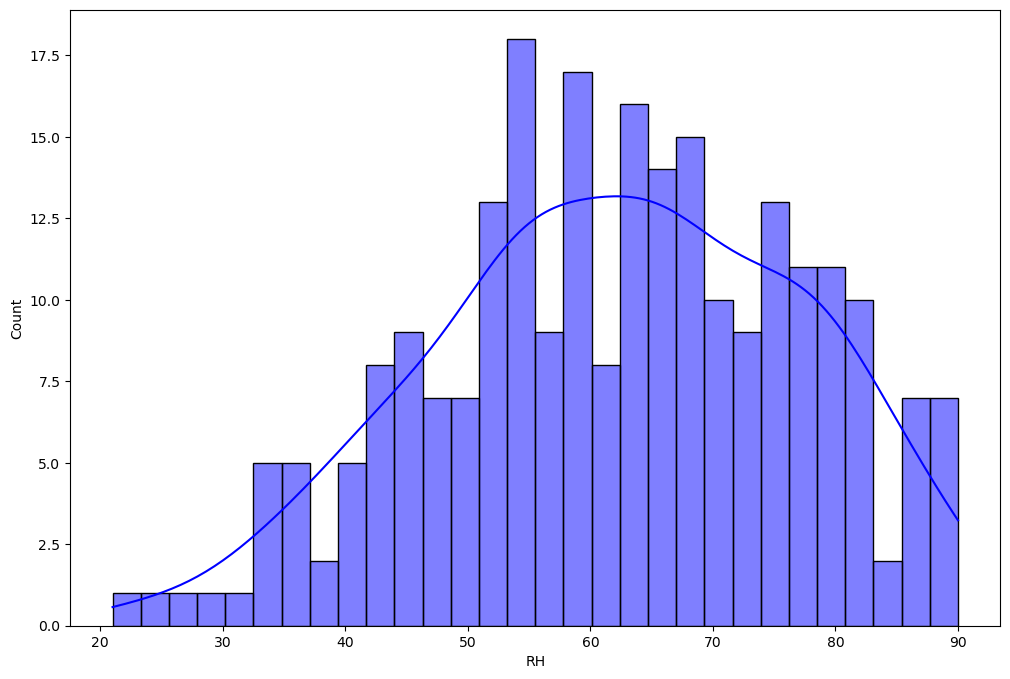

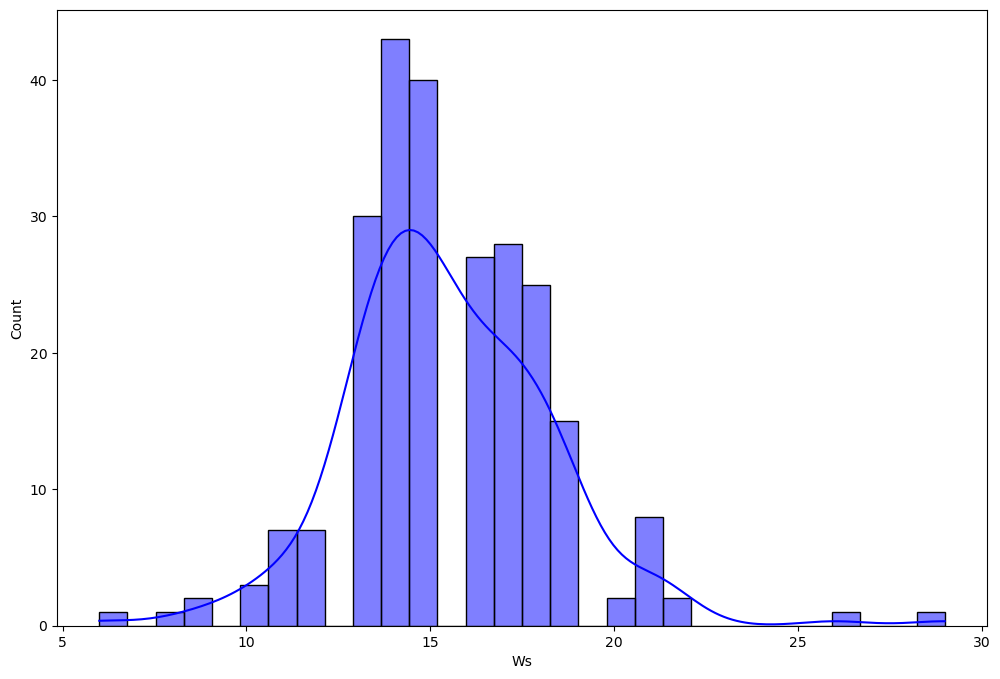

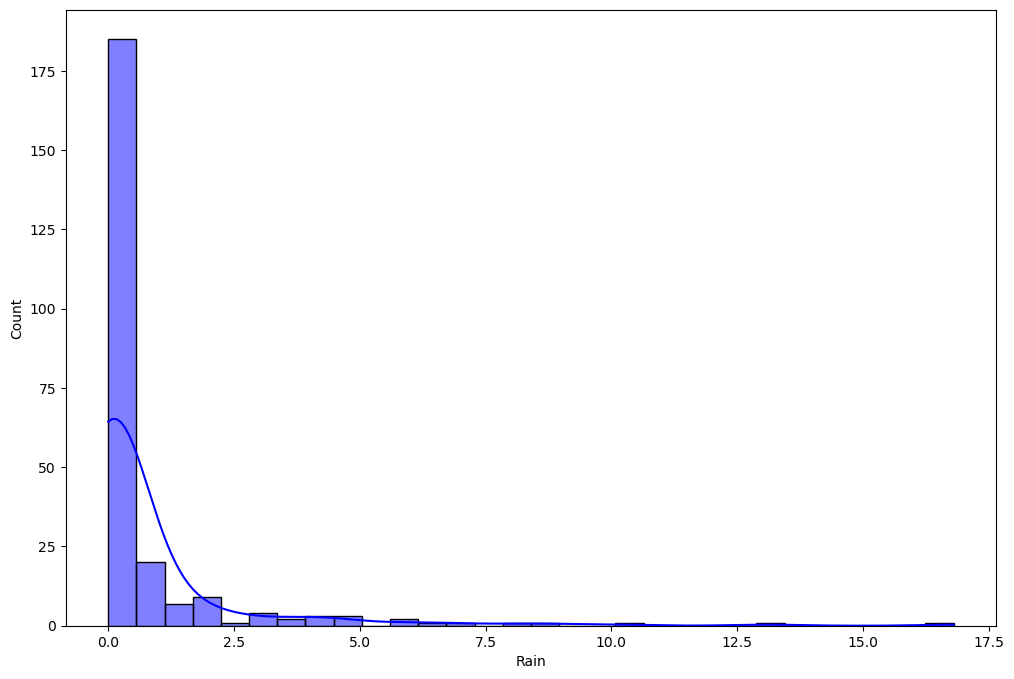

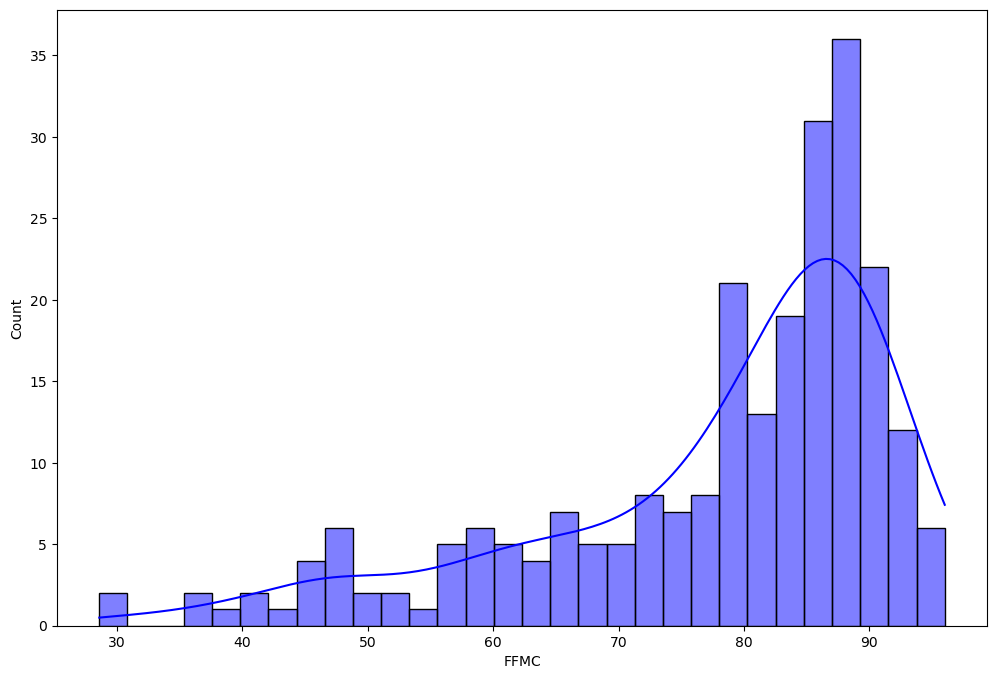

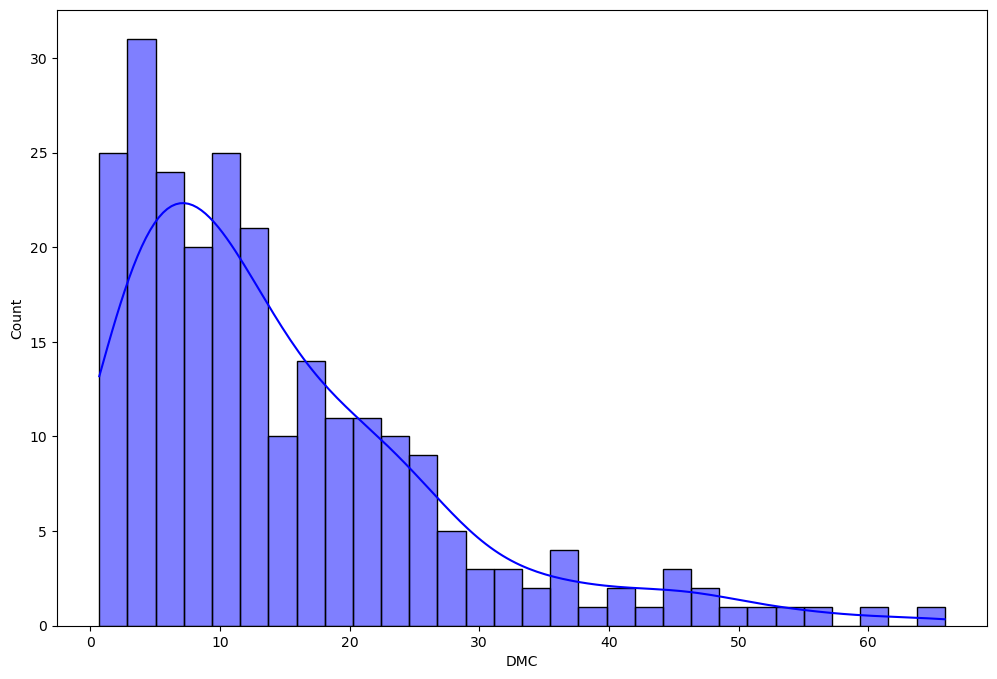

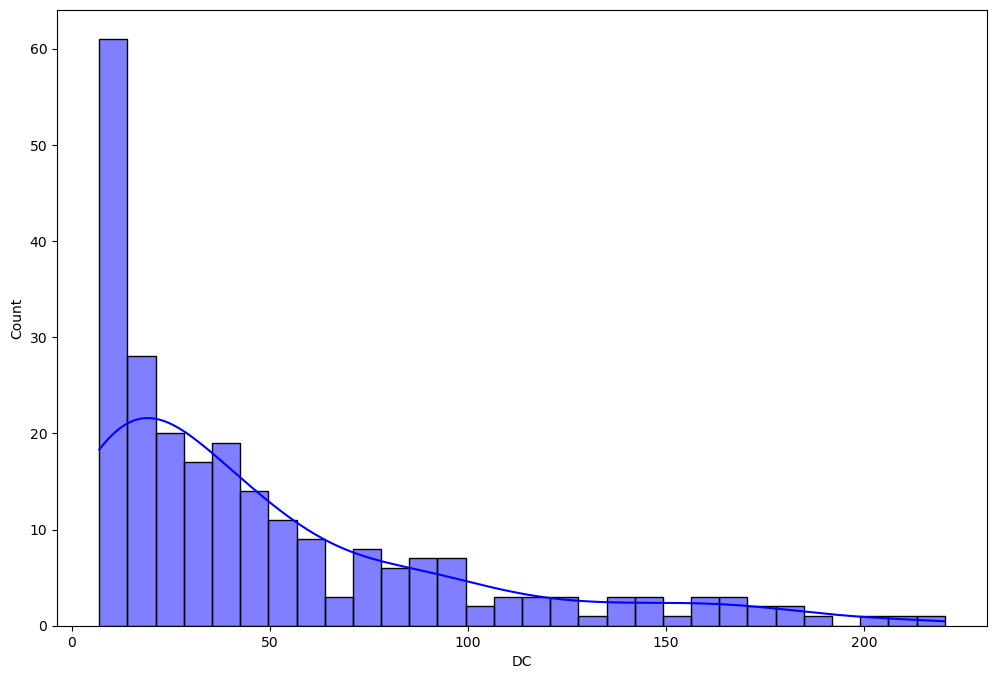

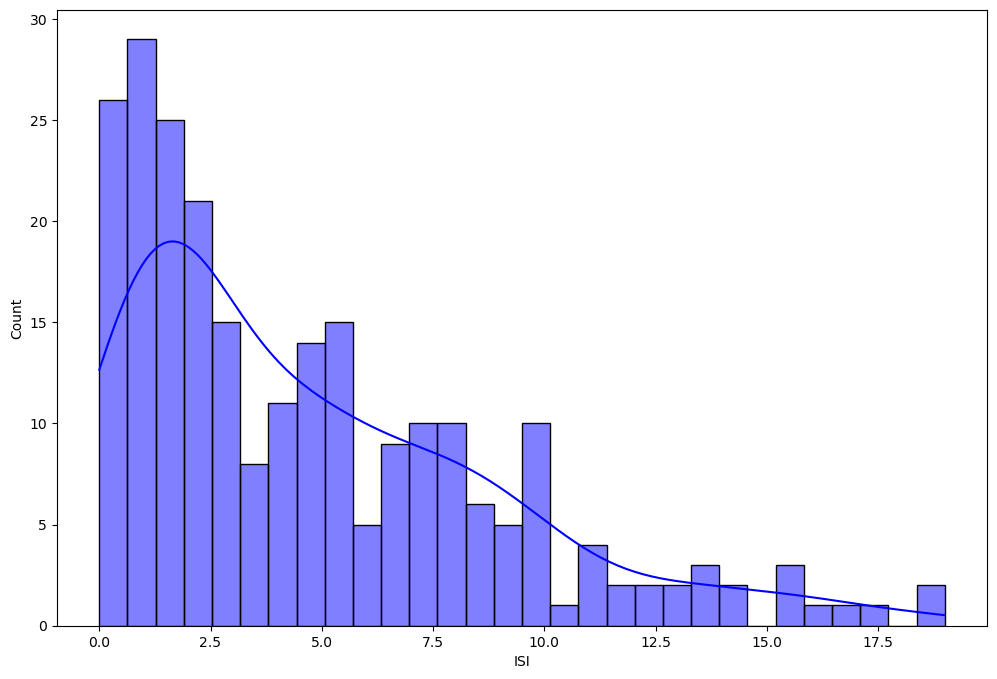

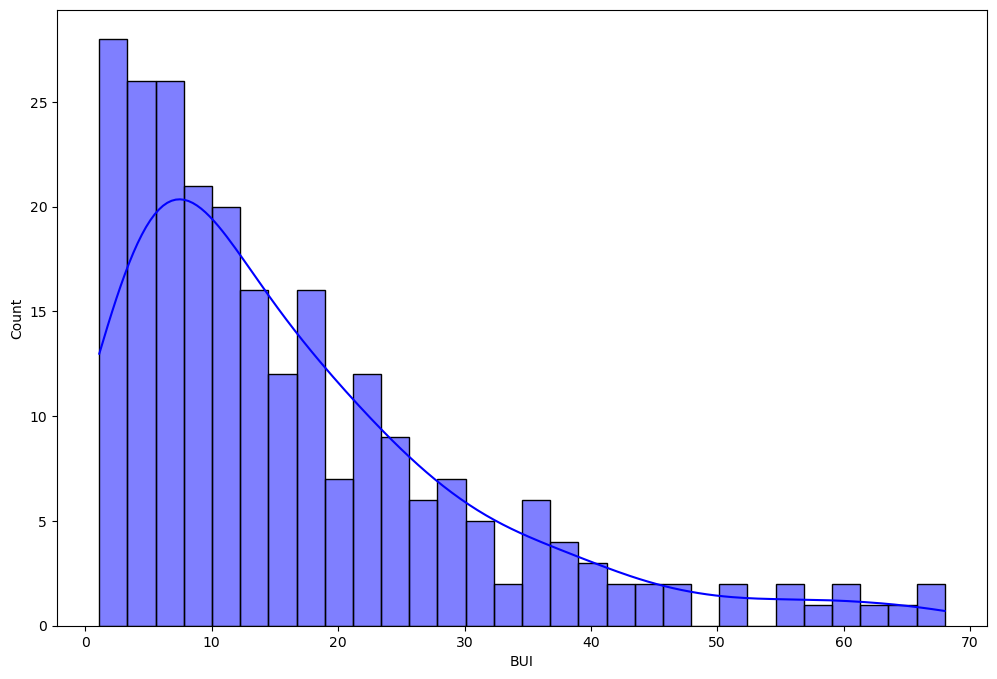

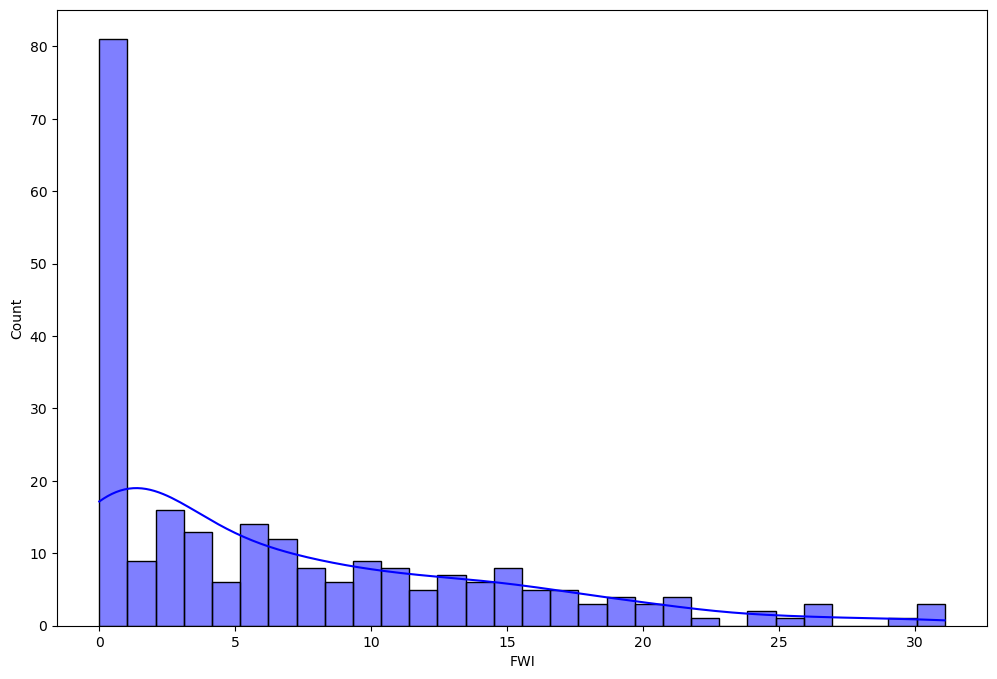

In [32]:
# Checking distribution of Continuous numerical features
for feature in continuous_features:
    plt.figure(figsize=(12,8))
    sns.histplot(data=df, x=feature,kde=True, bins=30, color='blue')
    plt.show();

# OUTLIERS HANDELING

Text(0.5, 1.0, 'Before Removing Outliers')

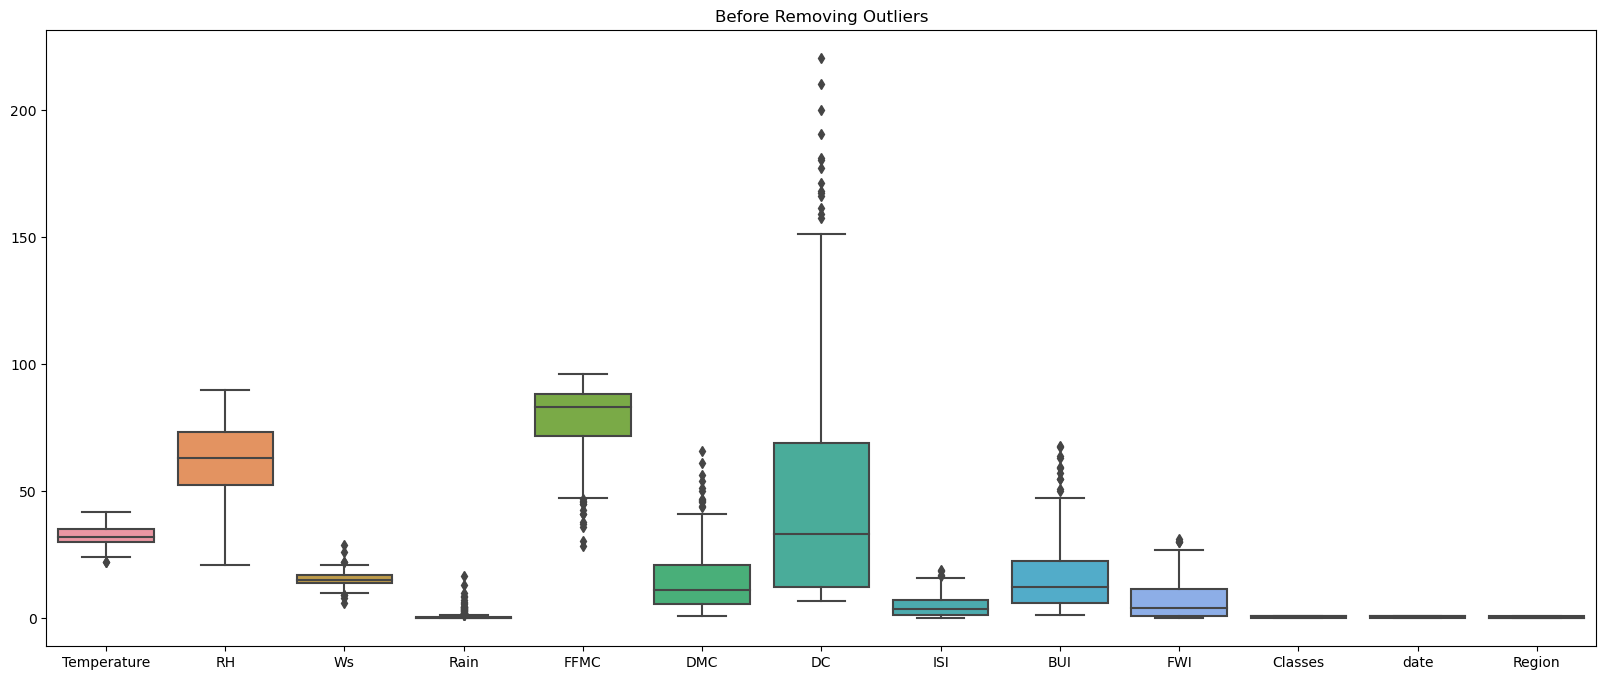

In [33]:
#Before removing Outliers
plt.figure(figsize=(20,8))
sns.boxplot(data=df)
plt.title("Before Removing Outliers")

In [34]:
#Function to find upper and lower boundaries
def find_boundries(df,variable,distance):
    IQR=df[variable].quantile(0.75)-df[variable].quantile(0.25)
    lower_boundry=df[variable].quantile(0.25)-(IQR*distance)
    upper_boundry=df[variable].quantile(0.25)+(IQR*distance)
    return upper_boundry,lower_boundry

In [35]:
# Deletion of outliers
outliers_columns=['Temperature','Ws','Rain','FFMC','DMC','ISI','BUI','FWI']
for i in outliers_columns:
    upper_boundry,lower_boundry=find_boundries(df,i,1.5)
    outliers=np.where(df[i]>upper_boundry,True,np.where(df[i]<lower_boundry,True,False))
    outliers_df=df.loc[outliers,i]
    df_trimed=df.loc[~outliers,i]
    df[i]=df_trimed

Text(0.5, 1.0, 'After Removing Outliers')

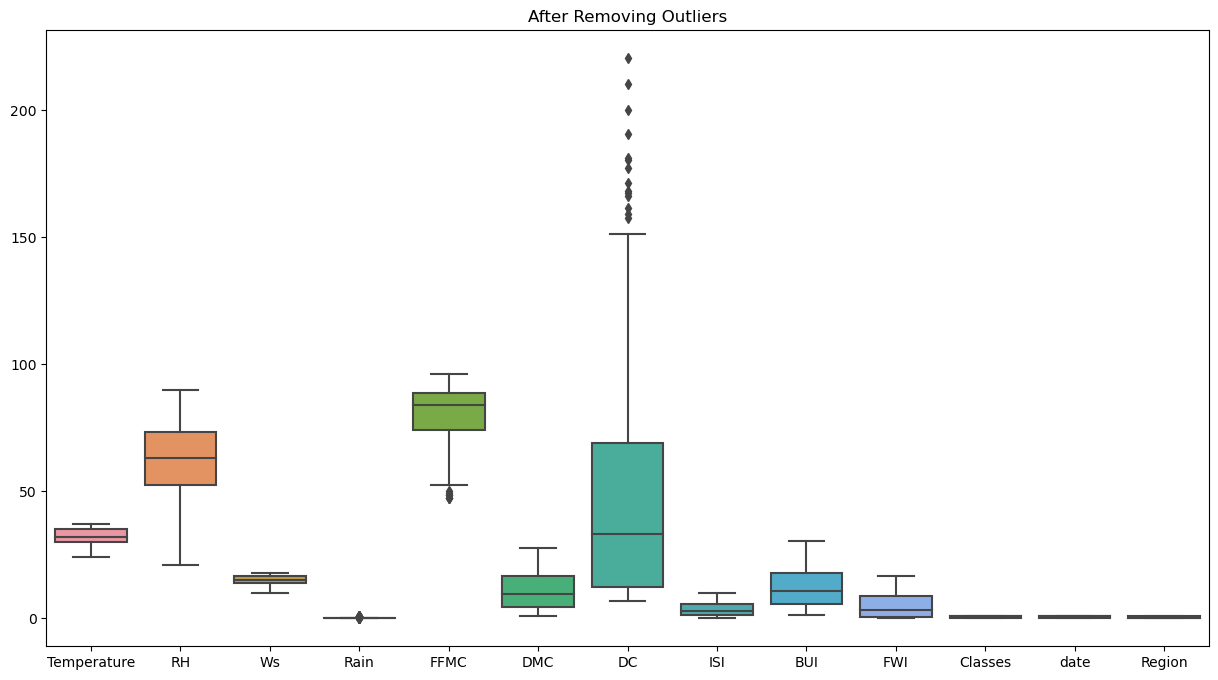

In [36]:
# After removal of outliers
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.title("After Removing Outliers")

Text(0.5, 1.0, 'After Removing Outliers')

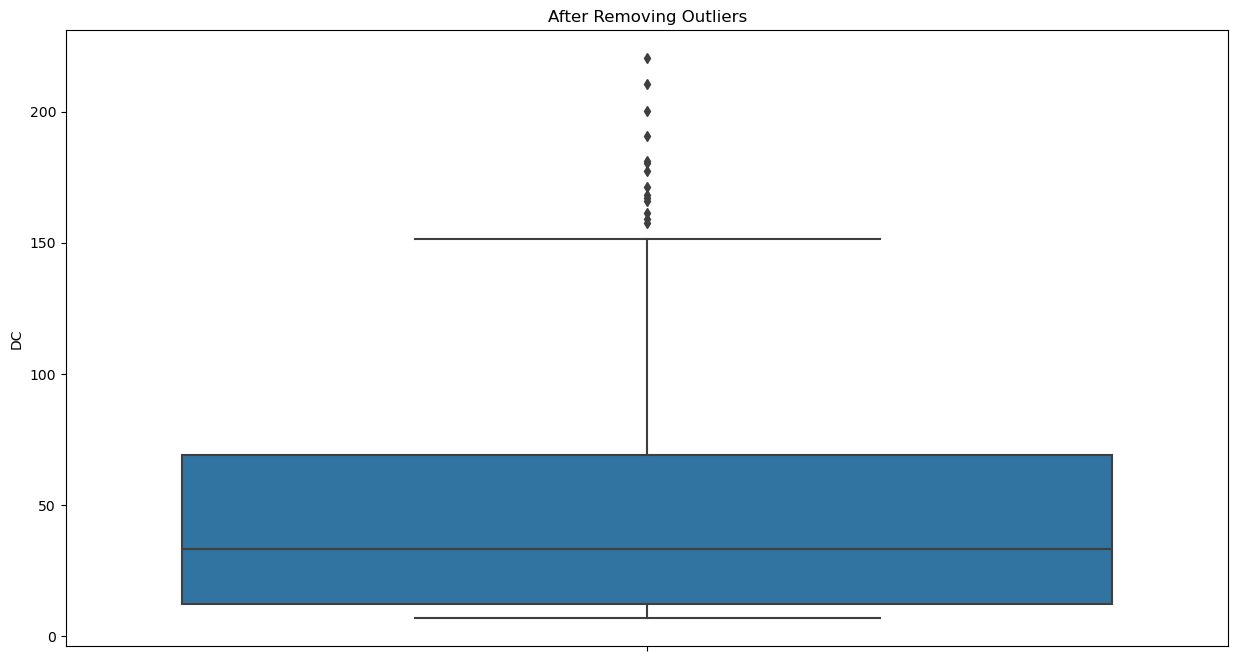

In [37]:
# Outliers Handling For DC feature
plt.figure(figsize=(15,8))
sns.boxplot(data=df,y='DC')
plt.title("After Removing Outliers")

Text(0.5, 1.0, 'After Removing Outliers')

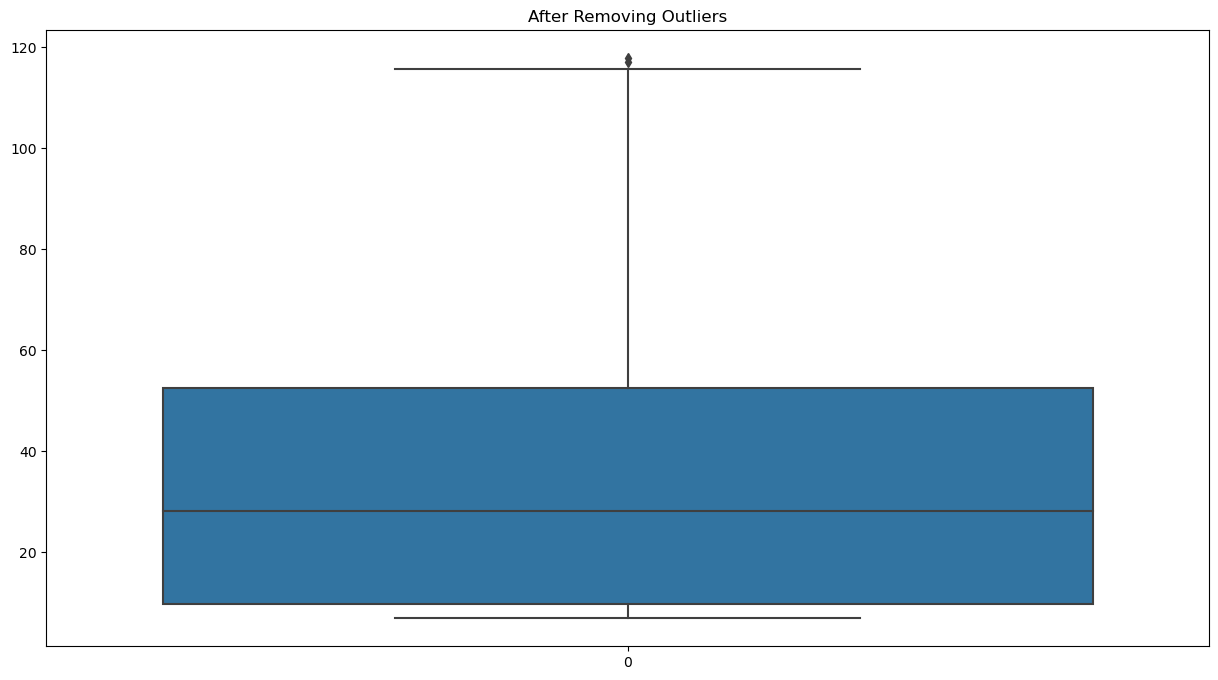

In [38]:
outliers=df[df['DC']>=118]['DC']
df['DC']=df[df['DC']<118]['DC']
plt.figure(figsize=(15,8))
sns.boxplot(data=df['DC'])
plt.title("After Removing Outliers")


In [39]:
# Check null value in eaxh column
df.isnull().sum()

Temperature    15
RH              0
Ws             33
Rain           46
FFMC           13
DMC            29
DC             25
ISI            24
BUI            34
FWI            28
Classes         0
date            0
Region          0
dtype: int64

In [40]:
df.isnull().sum()

Temperature    15
RH              0
Ws             33
Rain           46
FFMC           13
DMC            29
DC             25
ISI            24
BUI            34
FWI            28
Classes         0
date            0
Region          0
dtype: int64

In [41]:
df.sample(5)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,date,Region
132,30.0,41.0,15.0,0.0,89.4,13.3,22.5,8.4,13.1,10.0,1,0,1.0
105,NaN,76.0,NaN,NaN,47.4,1.1,7.0,0.4,1.6,0.1,0,0,0.0
215,28.0,67.0,NaN,0.0,75.4,2.9,16.3,2.0,4.0,0.8,0,0,1.0
144,33.0,46.0,14.0,NaN,78.3,8.1,8.3,1.9,7.7,1.2,0,0,1.0
154,33.0,48.0,16.0,0.0,87.6,7.9,17.8,6.8,7.8,6.4,1,1,1.0


In [42]:
# Imputation of null value with the mean
df.fillna(df.mean(),inplace=True)

In [43]:
# Check null value of each column
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
date           0
Region         0
dtype: int64

#  Statistical Analysis

In [44]:
# Correlation of numerical variable
data = round(df.corr(),2)

<Axes: >

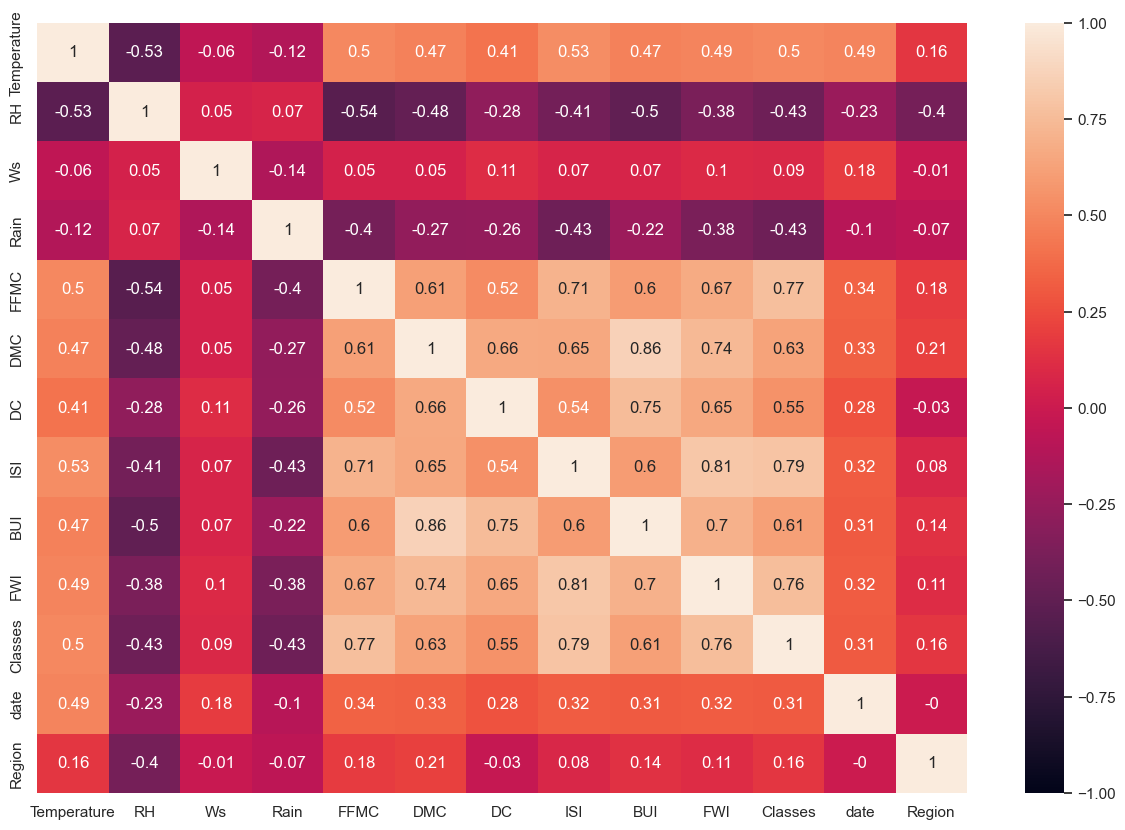

In [45]:
# Heatmap to check correlation between different variable
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=data, annot=True, vmin=-1, vmax=1)

In [46]:
#Observations 1. BUI and DMC are highly positvely correlated, so we will delete one feature i.e.,
#BUI
df.drop('BUI', axis=1, inplace=True)

# Model Building

<Axes: xlabel='date', ylabel='Temperature'>

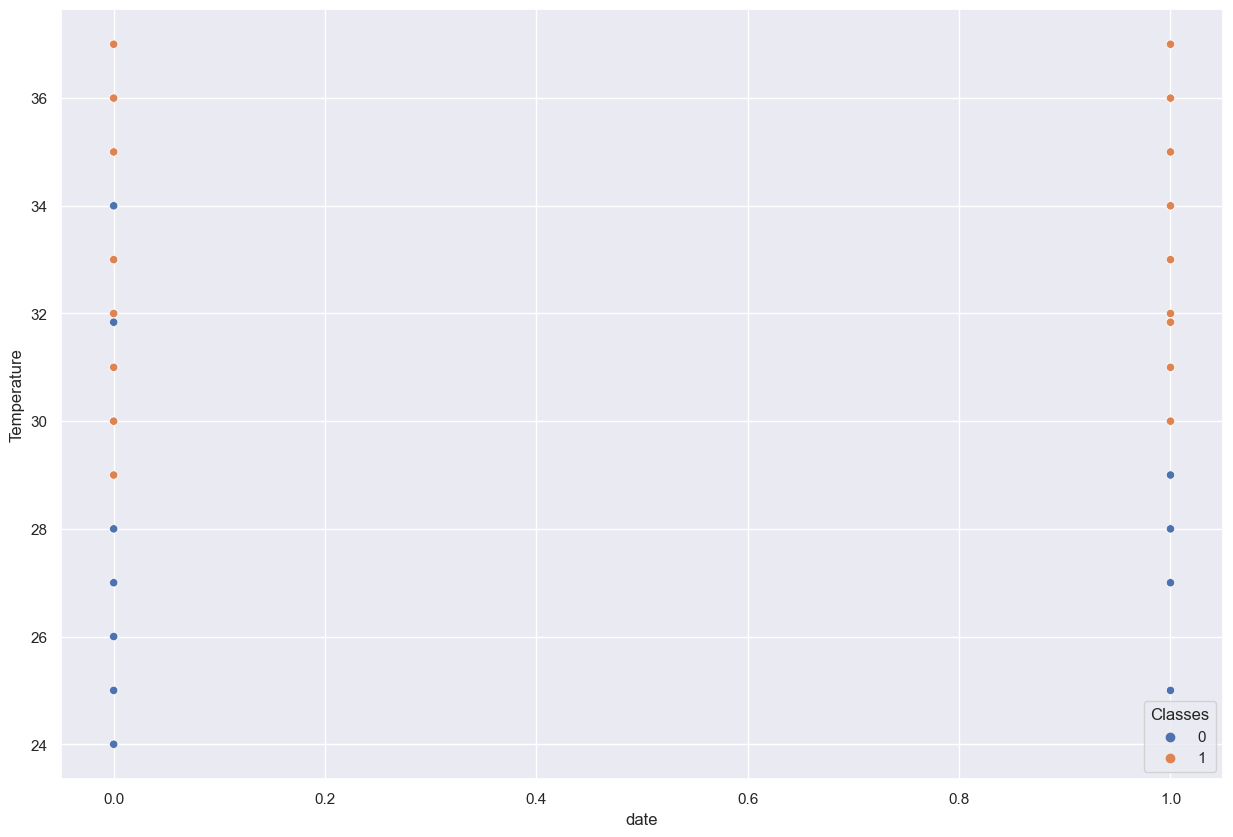

In [47]:
# Independent variable vs target variable distribution
sns.scatterplot(data=df, x='date', y='Temperature', hue='Classes' )

In [48]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'FWI',
       'Classes', 'date', 'Region'],
      dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    float64
 1   RH           243 non-null    float64
 2   Ws           243 non-null    float64
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   FWI          243 non-null    float64
 9   Classes      243 non-null    int64  
 10  date         243 non-null    int64  
 11  Region       243 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 32.8 KB


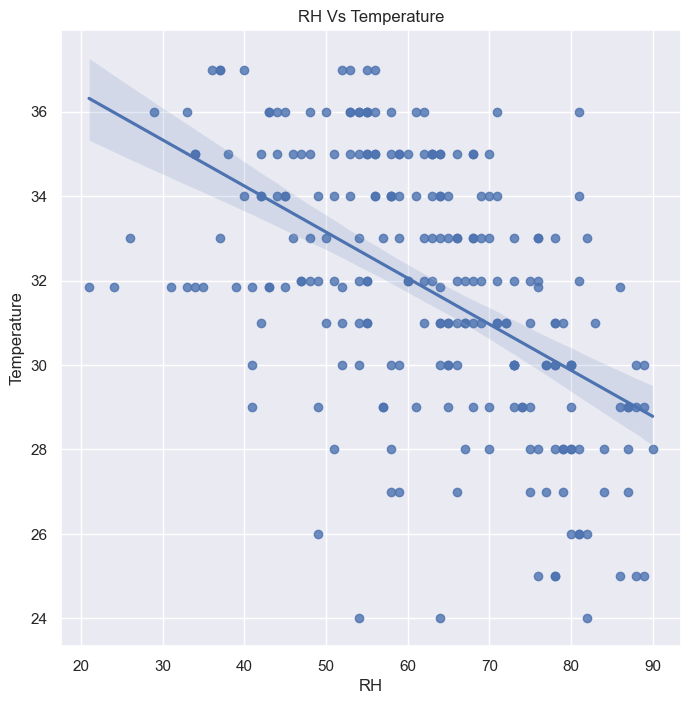

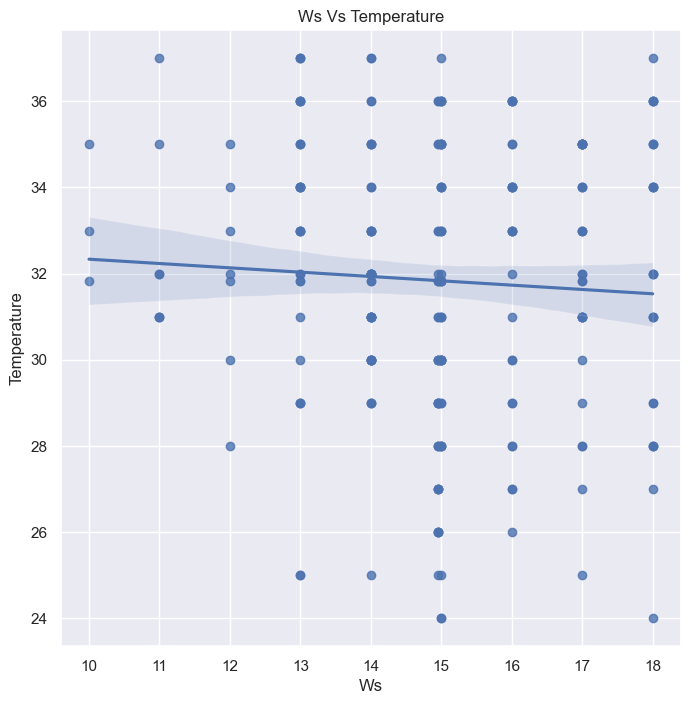

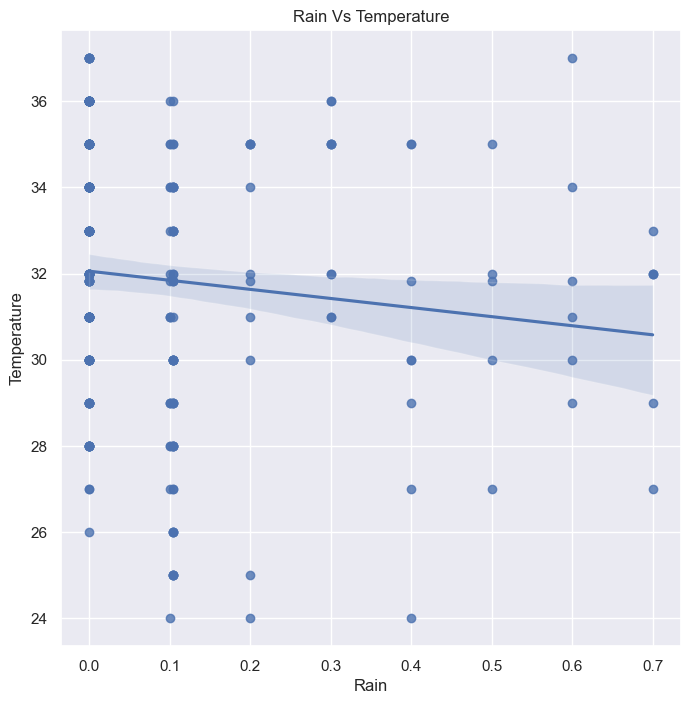

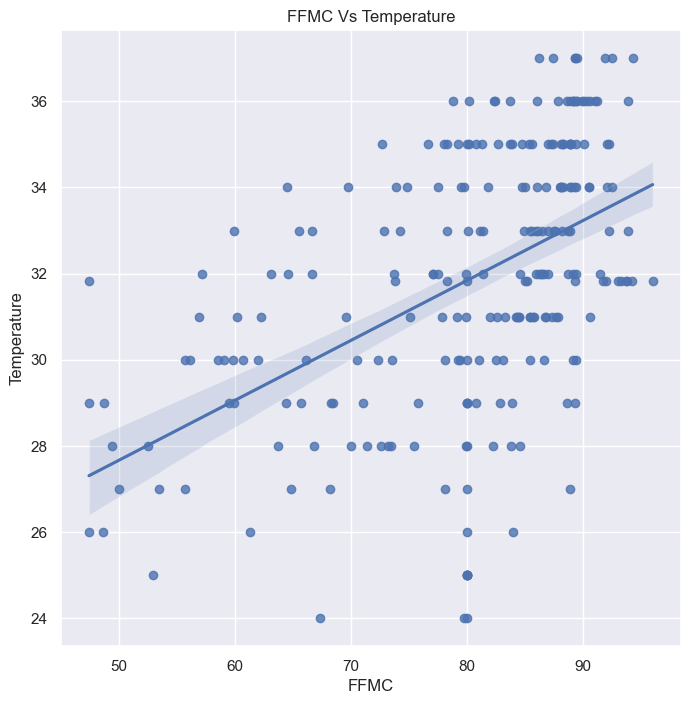

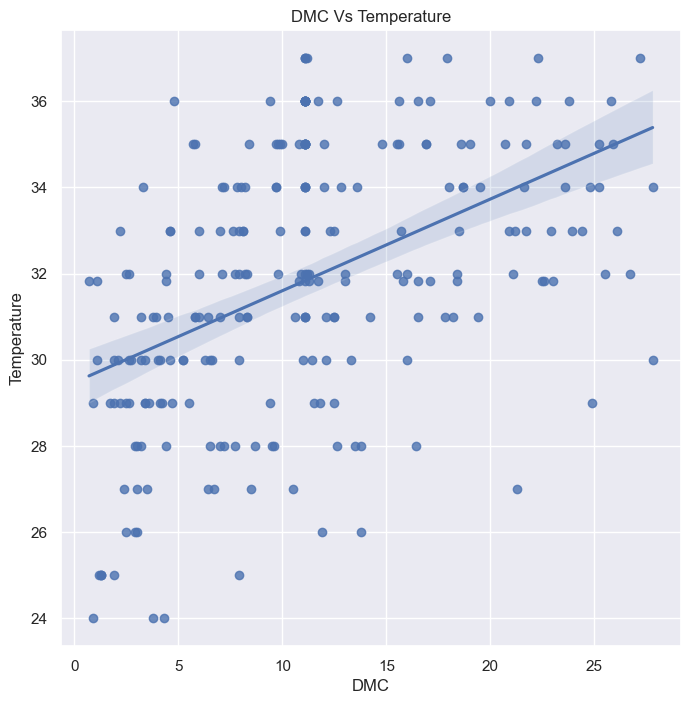

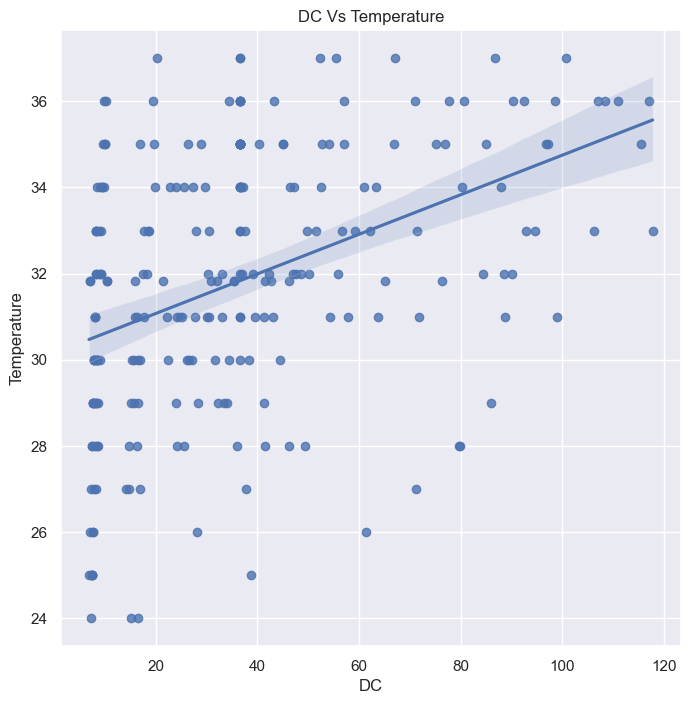

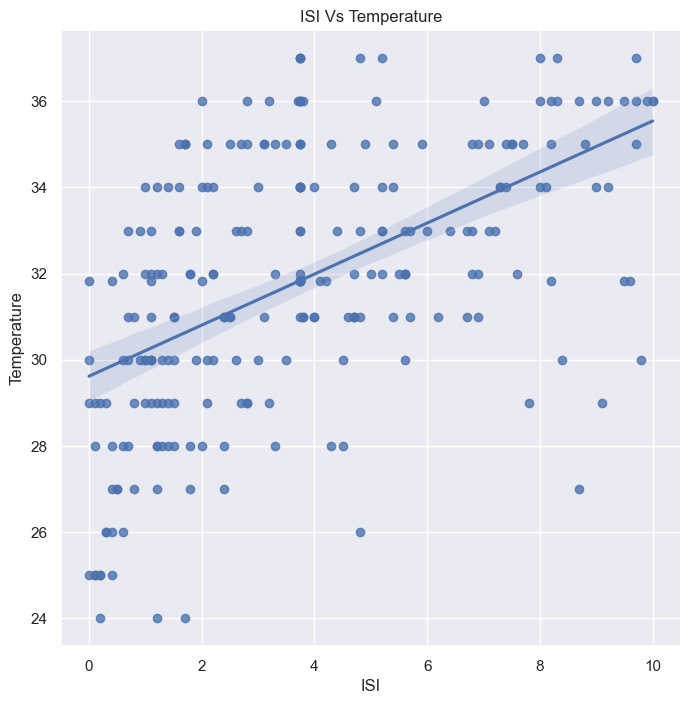

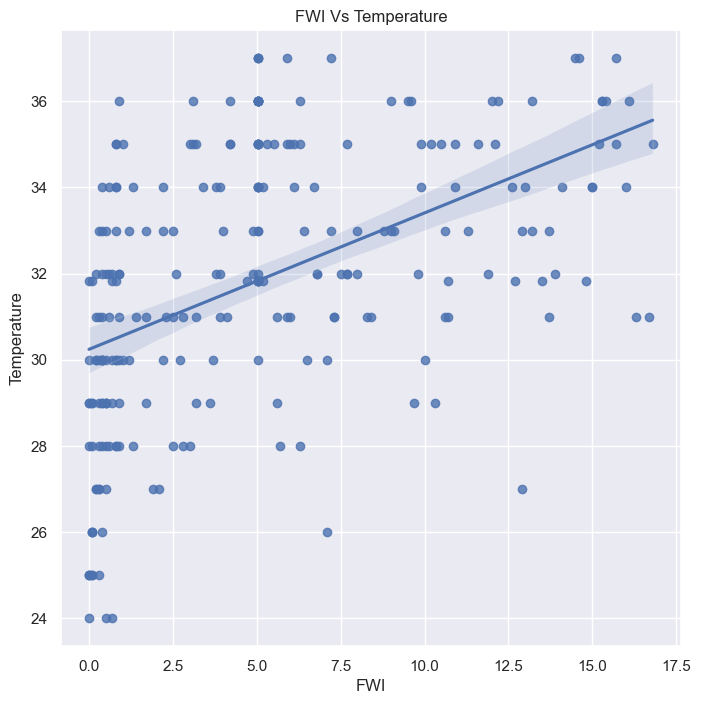

In [50]:
# Regression PLot
# #### shaded region is basically with respect to ridge and lasso (lambda)
for feature in [feature for feature in df.columns if feature not in ['Temperature', 'date', 'Region', 'Classes']]:
    sns.set(rc={'figure.figsize':(8,8)})
    sns.regplot(x=df[feature], y=df['Temperature'])
    plt.xlabel(feature)
    plt.ylabel("Temperature")
    plt.title("{} Vs Temperature".format(feature))
    plt.show();

In [51]:
# Segregate dependent and independent feature
### X independent features and y dependent feature
X= df[['RH', 'Ws', 'Rain','FFMC', 'DMC', 'ISI','DC',
'FWI', 'Classes', 'Region', 'date']]
y=df[['Temperature']]

In [52]:
X

,RH,Ws,Rain,FFMC,DMC,ISI,DC,FWI,Classes,Region,date
0,57.0,18.000000,0.000000,65.700000,3.4,1.3,7.6,0.5,0,0.0,0
1,61.0,13.000000,0.104061,64.400000,4.1,1.0,7.6,0.4,0,0.0,0
2,82.0,14.957143,0.104061,79.964348,2.5,0.3,7.1,0.1,0,0.0,0
3,89.0,13.000000,0.104061,79.964348,1.3,0.0,6.9,0.0,0,0.0,0
4,77.0,16.000000,0.000000,64.800000,3.0,1.2,14.2,0.5,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
239,65.0,14.000000,0.000000,85.400000,16.0,4.5,44.5,6.5,1,1.0,0
240,87.0,15.000000,0.104061,79.964348,6.5,0.1,8.0,0.0,0,1.0,0
241,87.0,14.957143,0.500000,79.964348,3.5,0.4,7.9,0.2,0,1.0,0
242,54.0,18.000000,0.100000,79.700000,4.3,1.7,15.2,0.7,0,1.0,0


In [53]:
#splitting the data into training and test dataset
### random state train test split will be same with all people using random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [54]:
# Scaling the feature
### creating a StandardScalar object
scaler=StandardScaler()
scaler

StandardScaler()

In [55]:
### Using fit_transform to standardise Train data
X_train=scaler.fit_transform(X_train)

In [56]:
### here using only transform to avoid data leakage
### (training mean and training std will be used for standardisation of test when we use transform on test data)
X_test=scaler.transform(X_test)

# Linear Regression Model

In [57]:
## creating linear regression model
linear_reg=LinearRegression()
linear_reg

LinearRegression()

In [58]:
pd.DataFrame(X_train).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [59]:
### Passing training data(X and y) to the model
linear_reg.fit(X_train, y_train)

LinearRegression()

In [60]:
### Printing co-efficients and intercept of best fit hyperplane
print("1. Co-efficients of independent features is {}".format(linear_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(linear_reg.intercept_))

1. Co-efficients of independent features is [[-1.15121965 -0.39970995  0.05397499 -0.34306706 -0.18270453  0.59961589
   0.37175093 -0.06476553  0.51822235  0.11540705  1.084404  ]]
2. Intercept of best fit hyper plane is [31.82531947]


In [101]:
#Prediction of test data
linear_reg_pred=linear_reg.predict(X_test)

In [62]:
residual_linear_reg=y_test-linear_reg_pred
residual_linear_reg = pd.DataFrame(residual_linear_reg)

Text(0, 0.5, 'Predicted data')

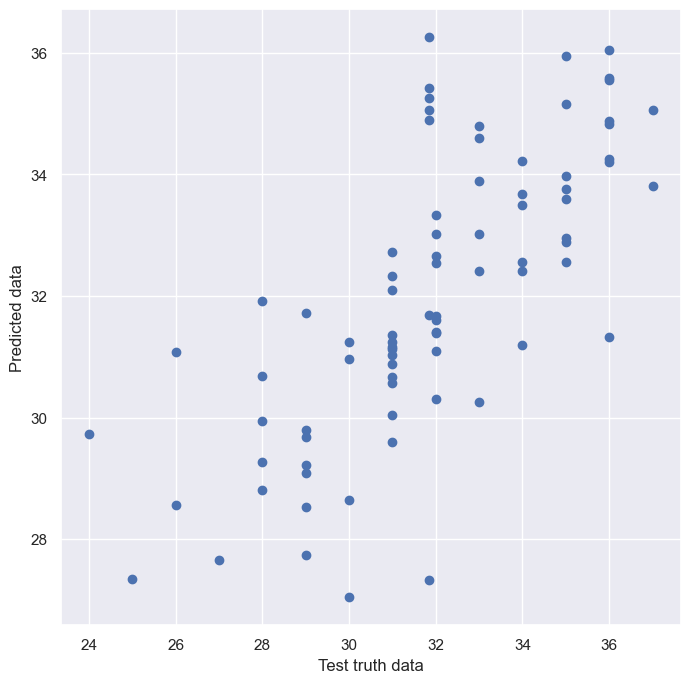

In [63]:
# Validation of Linear Regression assumptions
#1. Linear Relationship
plt.scatter(x=y_test,y=linear_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

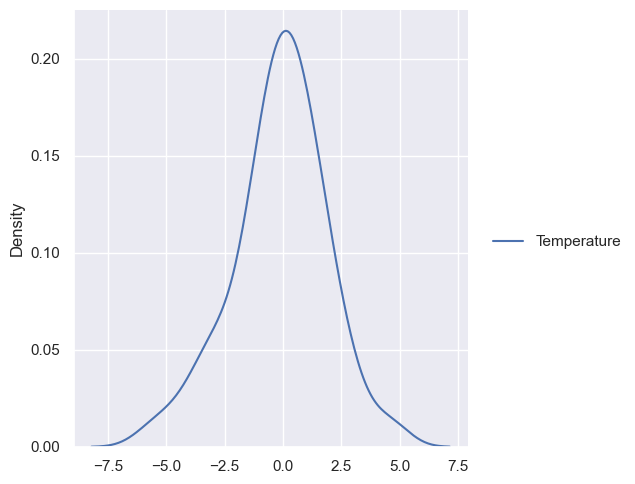

In [64]:
# 2. Residual should be normally distributed
sns.displot(data=residual_linear_reg, kind='kde')

Text(0, 0.5, 'Residuals')

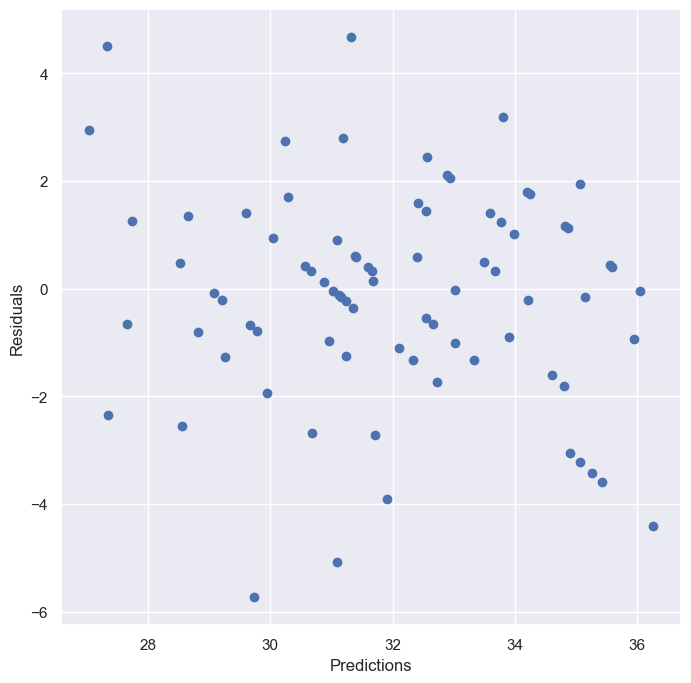

In [65]:
# 3. Residual and Predicted values should follow uniform distribution
plt.scatter(x=linear_reg_pred, y=residual_linear_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

In [66]:
# Cost Function Values
print(f"MSE : {round(mean_squared_error(y_test, linear_reg_pred),2)}\nMAE :{round(mean_absolute_error(y_test, linear_reg_pred),2)}\nRMSE : {round(np.sqrt(mean_squared_error(y_test, linear_reg_pred)),2)}")

MSE : 3.92
MAE :1.49
RMSE : 1.98


In [67]:
# Performance Metrics
linear_reg_r2_score=r2_score(y_test, linear_reg_pred)
linear_reg_adj_r2_score=1-((1-linear_reg_r2_score)*(len(y_test)-1)/
  (len(y_test)-X_test.shape[1]-1))
print(f"R-Squared Accuracy : {round(linear_reg_r2_score*100,3)} % \nAdjustedR-Squared Accuracy : {round(linear_reg_adj_r2_score*100,2)}%")

R-Squared Accuracy : 51.945 % 
AdjustedR-Squared Accuracy : 44.28%


In [68]:
# Ridge Regresion Model
## creating Ridge regression model
ridge_reg=Ridge()
ridge_reg

Ridge()

In [69]:
### Passing training data(X and y) to the model
ridge_reg.fit(X_train, y_train)

Ridge()

In [70]:
### Printing co-efficients and intercept of best fit hyperplane
print("1. Co-efficients of independent features is {}".format(ridge_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(ridge_reg.intercept_))

1. Co-efficients of independent features is [[-1.13777798 -0.39614084  0.05800843 -0.31924339 -0.1749791   0.58539615
   0.36404659 -0.05279827  0.50859094  0.11457566  1.07488453]]
2. Intercept of best fit hyper plane is [31.82531947]


In [71]:
# Prediction of test data
ridge_reg_pred=ridge_reg.predict(X_test)

In [72]:
residual_ridge_reg=y_test-ridge_reg_pred
residual_ridge_reg = pd.DataFrame(residual_ridge_reg)

Text(0, 0.5, 'Predicted data')

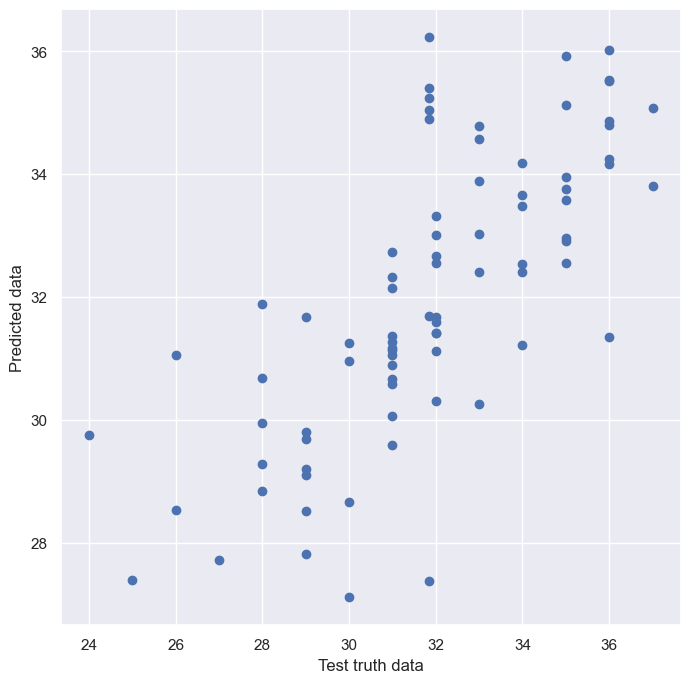

In [73]:
# Validation of Ridge Regression assumptions
#1. Linear Relationship
plt.scatter(x=y_test,y=ridge_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

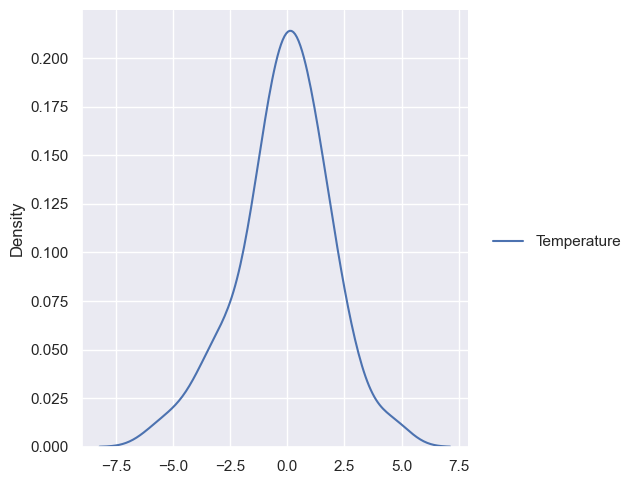

In [74]:
#2. Residual should be normally distributed
sns.displot(data = residual_ridge_reg, kind='kde')

Text(0, 0.5, 'Residuals')

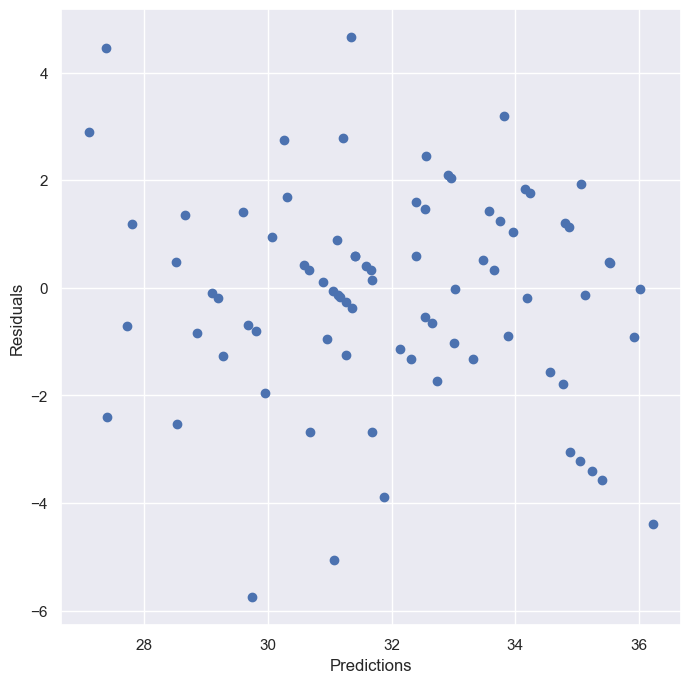

In [75]:
# 3. Residual and Predicted values should follow uniform distribution
plt.scatter(x=ridge_reg_pred, y=residual_ridge_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

In [76]:
# Cost Function Values
print(f"MSE : {round(mean_squared_error(y_test, ridge_reg_pred),2)}\nMAE :{round(mean_absolute_error(y_test, ridge_reg_pred),2)}\nRMSE : {round(np.sqrt(mean_squared_error(y_test, ridge_reg_pred)),2)}")

MSE : 3.9
MAE :1.49
RMSE : 1.97


In [77]:
# Performance Metrics
ridge_reg_r2_score=r2_score(y_test, ridge_reg_pred)
ridge_reg_adj_r2_score=1-((1-ridge_reg_r2_score)*(len(y_test)-1)/
  (len(y_test)-X_test.shape[1]-1))
print(f"R-Squared Accuracy : {round(ridge_reg_r2_score*100,3)} % \nAdjusted R-Squared Accuracy : {round(ridge_reg_adj_r2_score*100,2)}%")

R-Squared Accuracy : 52.23 % 
Adjusted R-Squared Accuracy : 44.61%


In [78]:
#Lasso Regression Model
 ## creating Lasso regression model
lasso_reg=Lasso()
lasso_reg

Lasso()

In [79]:
### Passing training data(X and y) to the model
lasso_reg.fit(X_train, y_train)

Lasso()

In [80]:
### Printing co-efficients and intercept of best fit hyperplane
print("1. Co-efficients of independent features is {}".format(lasso_reg.coef_))
print("2. Intercept of best fit hyper plane is {}".format(lasso_reg.intercept_))

1. Co-efficients of independent features is [-0.48380473 -0.         -0.          0.          0.          0.09096133
  0.          0.          0.18019046  0.          0.35285526]
2. Intercept of best fit hyper plane is [31.82531947]


In [81]:
#Prediction of test data
lasso_reg_pred=lasso_reg.predict(X_test)

In [82]:
y_test = y_test.squeeze()
residual_lasso_reg = y_test-lasso_reg_pred
residual_lasso_reg = pd.DataFrame(residual_lasso_reg)

Text(0, 0.5, 'Predicted data')

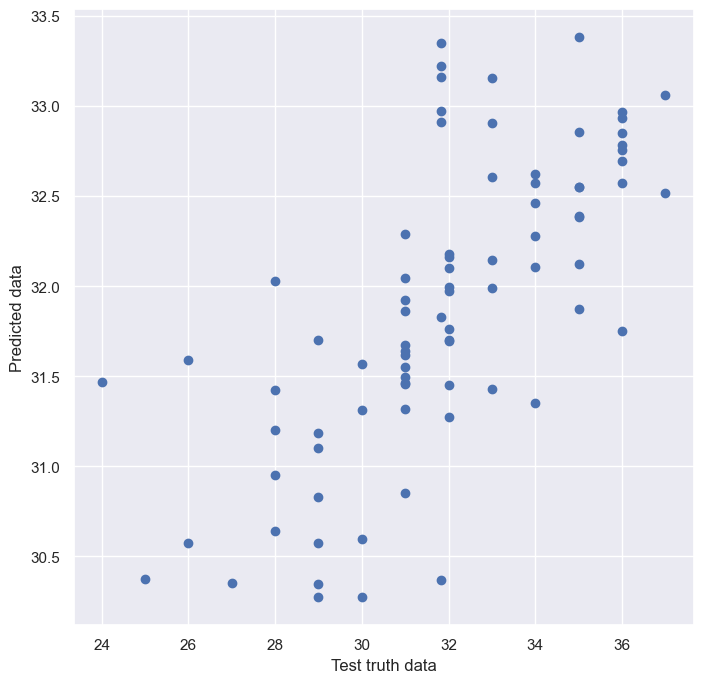

In [83]:
# Validation of Lasso Regression assumptions
# 1. Linear Relationship
plt.scatter(x=y_test,y=lasso_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

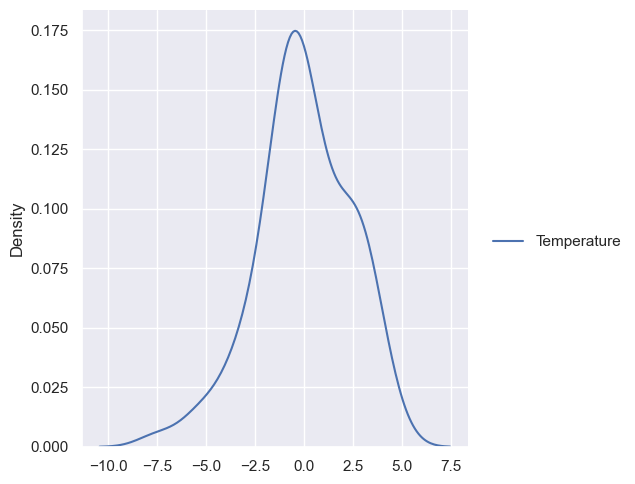

In [84]:
# 2. Residual should be normally distributed
sns.displot( data = residual_lasso_reg, kind='kde')

Text(0, 0.5, 'Residuals')

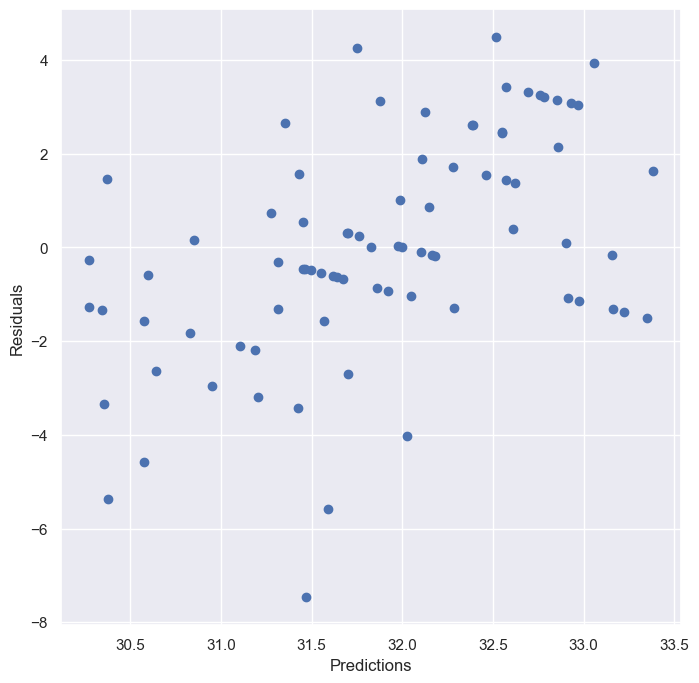

In [85]:
# 3. Residual and Predicted values should follow uniform distribution
plt.scatter(x=lasso_reg_pred, y=residual_lasso_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

In [86]:
# Cost Function Values
print(f"MSE : {round(mean_squared_error(y_test, lasso_reg_pred),2)}\nMAE :{round(mean_absolute_error(y_test, lasso_reg_pred),2)}\nRMSE : {round(np.sqrt(mean_squared_error(y_test, lasso_reg_pred)),2)}")


MSE : 5.58
MAE :1.83
RMSE : 2.36


In [87]:
# Performance Metrics
lasso_reg_r2_score=r2_score(y_test, lasso_reg_pred)
lasso_reg_adj_r2_score=1-((1-lasso_reg_r2_score)*(len(y_test)-1)/
  (len(y_test)-X_test.shape[1]-1))
print(f"R-Squared Accuracy : {round(lasso_reg_r2_score*100,3)} % \nAdjustedR-Squared Accuracy : {round(lasso_reg_adj_r2_score*100,2)}%")

R-Squared Accuracy : 31.637 % 
AdjustedR-Squared Accuracy : 20.74%


In [88]:
# Elastic Net Regression Model
## creating Elastic-Net regression model
elastic_reg=ElasticNet()
elastic_reg

ElasticNet()

In [89]:
### Passing training data(X and y) to the model
elastic_reg.fit(X_train, y_train)

ElasticNet()

In [90]:
### Printing co-efficients and intercept of best fit hyperplane
print("1. Co-efficients of independent features is {}".format(elastic_reg.
  coef_))
print("2. Intercept of best fit hyper plane is {}".format(elastic_reg.
  intercept_))

1. Co-efficients of independent features is [-0.52094944 -0.         -0.          0.1088706   0.01143868  0.22423506
  0.03061723  0.06718775  0.23932111  0.          0.47192443]
2. Intercept of best fit hyper plane is [31.82531947]


In [91]:
# Prediction of test data
elastic_reg_pred=elastic_reg.predict(X_test)

In [92]:
residual_elastic_reg=y_test-elastic_reg_pred
residual_elastic_reg = pd.DataFrame(residual_elastic_reg)

Text(0, 0.5, 'Predicted data')

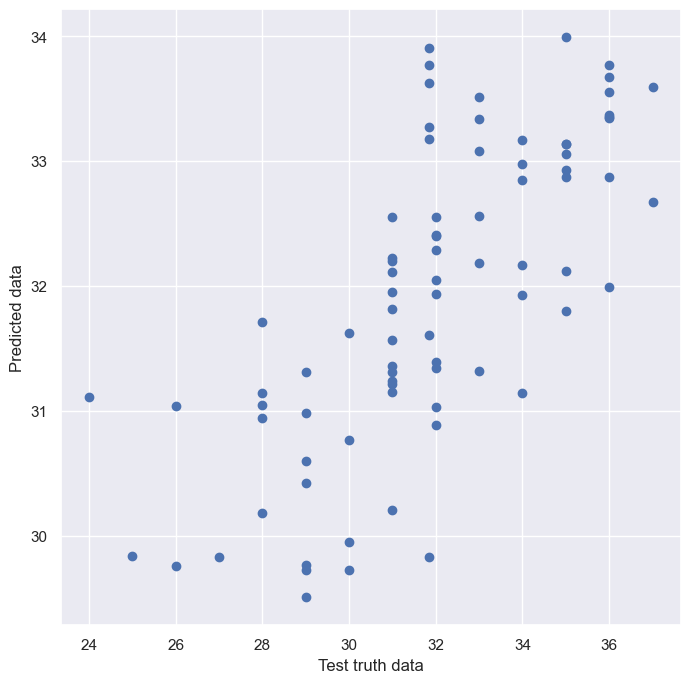

In [93]:
# Validation of Elastic Regression assumptions
#1. Linear Relationship
plt.scatter(x=y_test,y=elastic_reg_pred)
plt.xlabel("Test truth data")
plt.ylabel("Predicted data")

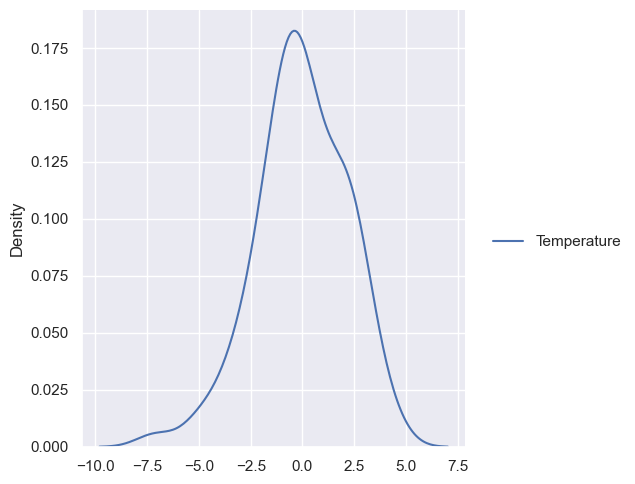

In [94]:
# 2. Residual should be normally distributed
sns.displot( data = residual_elastic_reg, kind='kde')

Text(0, 0.5, 'Residuals')

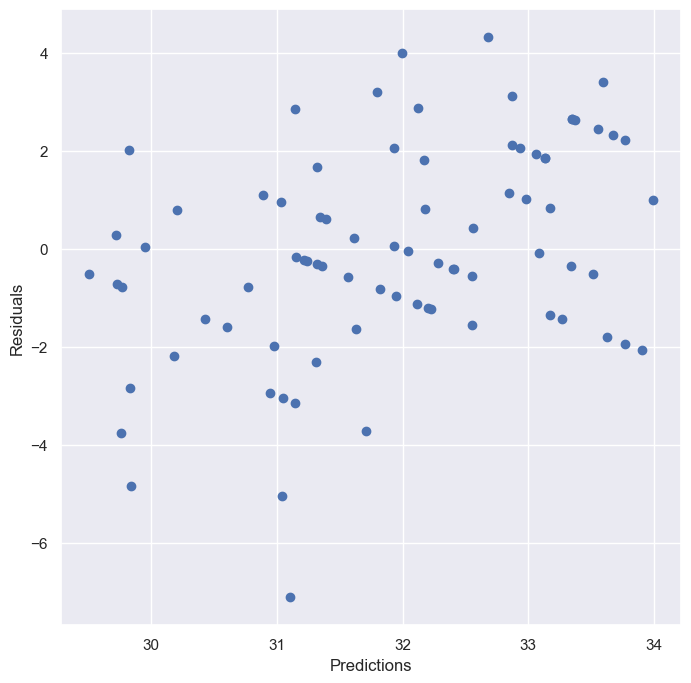

In [95]:
# 3. Residual and Predicted values should follow uniform distribution
plt.scatter(x=elastic_reg_pred, y=residual_elastic_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

In [96]:
# Cost Function Values
print(f"MSE : {round(mean_squared_error(y_test, elastic_reg_pred),2)}\nMAE :{round(mean_absolute_error(y_test, elastic_reg_pred),2)}\nRMSE : {round(np.sqrt(mean_squared_error(y_test, elastic_reg_pred)),2)}")

MSE : 4.62
MAE :1.68
RMSE : 2.15


In [97]:
# Performance Metrics
elastic_reg_r2_score=r2_score(y_test, elastic_reg_pred)
elastic_reg_adj_r2_score=1-((1-elastic_reg_r2_score)*(len(y_test)-1)/
  (len(y_test)-X_test.shape[1]-1))
print(f"R-Squared Accuracy : {round(elastic_reg_r2_score*100,3)} % \nAdjusted R-Squared Accuracy : {round(elastic_reg_adj_r2_score*100,2)}%")

R-Squared Accuracy : 43.387 % 
Adjusted R-Squared Accuracy : 34.36%


In [98]:
# Comparisions of all Models
# cost function values
print(f"--------------------------------------")
print(f"MSE:\n1. Linear Regression : {round(mean_squared_error(y_test,linear_reg_pred),2)}\n2. Ridge Regression : {round(mean_squared_error(y_test, ridge_reg_pred),2)}\n3. Lasso Regression :{round(mean_squared_error(y_test, lasso_reg_pred),2)}\n4. Elastic Net Regression : {round(mean_squared_error(y_test, elastic_reg_pred),2)}")
print(f"---------------------------------------")
print(f"MAE:\n1. Linear Regression : {round(mean_absolute_error(y_test,linear_reg_pred),2)}\n2. Ridge Regression :{round(mean_absolute_error(y_test, ridge_reg_pred),2)}\n3. Lasso Regression : {round(mean_absolute_error(y_test, lasso_reg_pred),2)}\n4. Elastic Net Regression : {round(mean_absolute_error(y_test, elastic_reg_pred),2)}")
print(f"--------------------------------------")
print(f"RMSE:\n1. Linear Regression : {round(np.sqrt(mean_squared_error(y_test,linear_reg_pred)),2)}\n2. Ridge Regression : {round(np.sqrt(mean_squared_error(y_test, ridge_reg_pred)),2)}\n3. Lasso Regression :{round(np.sqrt(mean_squared_error(y_test, lasso_reg_pred)),2)}\n4. Elastic Net Regression : {round(np.sqrt(mean_squared_error(y_test, elastic_reg_pred)),2)}")
print(f"--------------------------------------")

--------------------------------------
MSE:
1. Linear Regression : 3.92
2. Ridge Regression : 3.9
3. Lasso Regression :5.58
4. Elastic Net Regression : 4.62
---------------------------------------
MAE:
1. Linear Regression : 1.49
2. Ridge Regression :1.49
3. Lasso Regression : 1.83
4. Elastic Net Regression : 1.68
--------------------------------------
RMSE:
1. Linear Regression : 1.98
2. Ridge Regression : 1.97
3. Lasso Regression :2.36
4. Elastic Net Regression : 2.15
--------------------------------------


In [99]:
# Performance Metrics
print(f"--------------------------------------")
print(f"R-Squared Accuracy:\n1. Linear Regression :{round(linear_reg_r2_score*100,3)} %\n2. Ridge Regression :{round(ridge_reg_r2_score*100,3)} %\n3. Lasso Regression :{round(lasso_reg_r2_score*100,3)} %\n4. Elastic Net Regression :␣{round(elastic_reg_r2_score*100,3)} %")
print(f"--------------------------------------")
print(f"Adjusted R-Squared Accuracy:\n1. Linear Regression :{round(linear_reg_adj_r2_score*100,3)} %\n2. Ridge Regression :{round(ridge_reg_adj_r2_score*100,3)} %\n3. Lasso Regression :{round(lasso_reg_adj_r2_score*100,3)} %\n4. Elastic Net Regression :{round(elastic_reg_adj_r2_score*100,3)} %")
print(f"--------------------------------------")

--------------------------------------
R-Squared Accuracy:
1. Linear Regression :51.945 %
2. Ridge Regression :52.23 %
3. Lasso Regression :31.637 %
4. Elastic Net Regression :␣43.387 %
--------------------------------------
Adjusted R-Squared Accuracy:
1. Linear Regression :44.285 %
2. Ridge Regression :44.615 %
3. Lasso Regression :20.739 %
4. Elastic Net Regression :34.361 %
--------------------------------------


In [100]:
# Conslusion
'''
• If we use the date feature without categorizing then our accuracy will be around 50 % and
after the inclusion of categorization it has increased to 66 %, though it is not so good.

• We can remove skewness from the data and also can use some method to handle imbalanced
data in Rain feature. This is just a basic model. I will add all the possible techniques to
improve accuracy in next session.
'''

'\n• If we use the date feature without categorizing then our accuracy will be around 50 % and\nafter the inclusion of categorization it has increased to 66 %, though it is not so good.\n\n• We can remove skewness from the data and also can use some method to handle imbalanced\ndata in Rain feature. This is just a basic model. I will add all the possible techniques to\nimprove accuracy in next session.\n'